In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
housing = fetch_california_housing(as_frame=True)
data = housing.frame

X = data.drop("MedHouseVal", axis=1)
y = data["MedHouseVal"]


In [4]:
data.shape

(20640, 9)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print("Linear Regression R²:", r2_lin)
print("Linear Regression RMSE:", rmse_lin)


Linear Regression R²: 0.575787706032451
Linear Regression RMSE: 0.7455813830127763


In [8]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("Polynomial Regression R²:", r2_poly)
print("Polynomial Regression RMSE:", rmse_poly)


Polynomial Regression R²: 0.6456819729261979
Polynomial Regression RMSE: 0.6813967448044586


In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge R²:", r2_ridge)
print("Ridge RMSE:", rmse_ridge)


Ridge R²: 0.5758157428913684
Ridge RMSE: 0.7455567442814779


In [10]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso R²:", r2_lasso)
print("Lasso RMSE:", rmse_lasso)
print("Zero coefficients:", np.sum(lasso.coef_ == 0))


Lasso R²: 0.5816154300698727
Lasso RMSE: 0.7404423656125414
Zero coefficients: 1


In [11]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

y_pred_elastic = elastic.predict(X_test_scaled)

r2_elastic = r2_score(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_elastic))

print("Elastic Net R²:", r2_elastic)
print("Elastic Net RMSE:", rmse_elastic)


Elastic Net R²: 0.5803193128873085
Elastic Net RMSE: 0.741588390137535


In [12]:
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial Regression",
        "Ridge Regression",
        "Lasso Regression",
        "Elastic Net Regression"
    ],
    "R2_Score": [
        r2_lin, r2_poly, r2_ridge, r2_lasso, r2_elastic
    ],
    "RMSE": [
        rmse_lin, rmse_poly, rmse_ridge, rmse_lasso, rmse_elastic
    ]
})

results


,Model,R2_Score,RMSE
0,Linear Regression,0.575788,0.745581
1,Polynomial Regression,0.645682,0.681397
2,Ridge Regression,0.575816,0.745557
3,Lasso Regression,0.581615,0.740442
4,Elastic Net Regression,0.580319,0.741588


In [13]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lin_reg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "ElasticNet": elastic.coef_
})

coef_df


,Feature,Linear,Ridge,Lasso,ElasticNet
0,MedInc,0.854383,0.854327,0.800957,0.823963
1,HouseAge,0.122546,0.122624,0.127087,0.130005
2,AveRooms,-0.294410,-0.294210,-0.162759,-0.216074
3,AveBedrms,0.339259,0.339008,0.206207,0.256299
4,Population,-0.002308,-0.002282,-0.000000,-0.000000
5,AveOccup,-0.040829,-0.040833,-0.030602,-0.035948
6,Latitude,-0.896929,-0.896168,-0.790113,-0.788420
7,Longitude,-0.869842,-0.869071,-0.755674,-0.757036


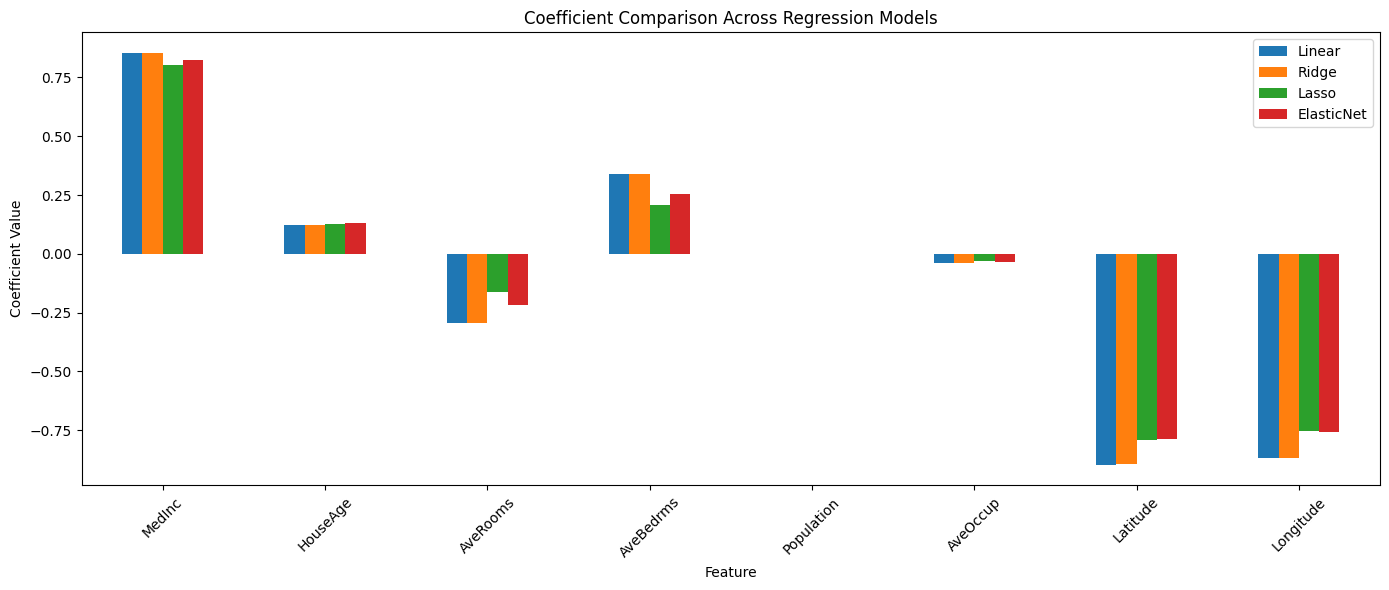

In [14]:
coef_df.set_index("Feature").plot(
    kind="bar",
    figsize=(14,6)
)

plt.title("Coefficient Comparison Across Regression Models")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
alphas = np.logspace(-3, 2, 20)
ridge_rmse = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    ridge_rmse.append(rmse)


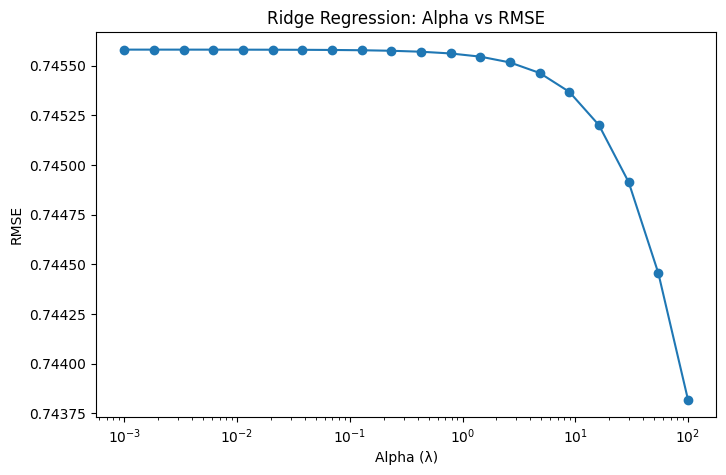

In [16]:
plt.figure(figsize=(8,5))
plt.plot(alphas, ridge_rmse, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("RMSE")
plt.title("Ridge Regression: Alpha vs RMSE")
plt.show()


In [17]:
lasso_rmse = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=5000)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    lasso_rmse.append(rmse)


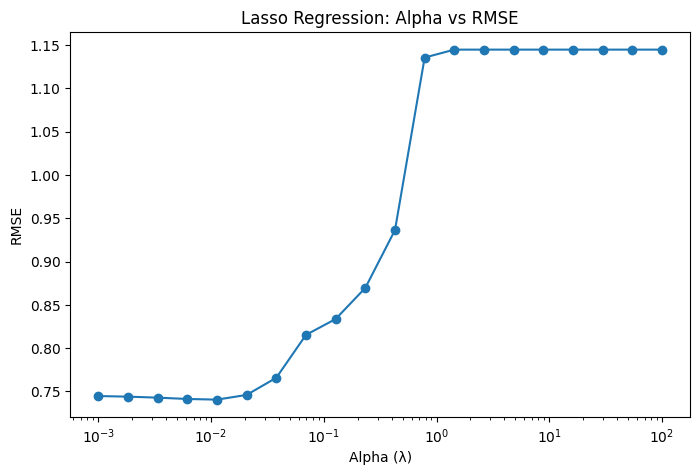

In [18]:
plt.figure(figsize=(8,5))
plt.plot(alphas, lasso_rmse, marker='o')
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("RMSE")
plt.title("Lasso Regression: Alpha vs RMSE")
plt.show()
